<a href="https://colab.research.google.com/github/EzhilSaha/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-7.86,99.00,99.00,

In [69]:

columnsData = df.loc[ 3416  , [31]]
columnsData               

31    2.09
Name: 3416, dtype: float64

In [21]:
df.shape

(24983, 101)

In [28]:
df.replace(99.00, np.nan,inplace=True)


In [29]:
print(df)

         0     1     2     3     4     5    ...   95    96    97    98    99    100
0       74.0 -7.82  8.79 -9.66 -8.16 -7.52  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      100.0  4.08 -0.29  6.36  4.37 -2.38  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       49.0   NaN   NaN   NaN   NaN  9.03  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       48.0   NaN  8.35   NaN   NaN  1.80  ...   NaN   NaN   NaN   NaN   NaN   NaN
4       91.0  8.50  4.61 -4.17 -5.39  1.36  ...  5.73  1.55  3.11  6.55  1.80  1.60
...      ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  100.0  0.44  7.43  9.08  2.33  3.20  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979   91.0  9.13 -8.16  8.59  9.08  0.87  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   39.0   NaN   NaN   NaN   NaN -7.77  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   37.0   NaN   NaN   NaN   NaN -9.71  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982   72.0  2.43  2.67 -3.98  4.27 -2.28  ...   NaN   NaN   NaN   NaN   Na

In [30]:
df_1=df

In [34]:
df_1.drop(columns=[0], axis=1, inplace=True)
df_1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,NaN,1.

In [35]:
mean_ratings = df_1.mean(axis = 0) #Calculating mean for all rows 
mean_ratings

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64

In [37]:
#  Use pandas to find the best- and the worst-rated jokes

print(mean_ratings.max() )
print("Best rated joke: ",mean_ratings.idxmax() )

print(mean_ratings.min() )
print("Worst rated joke: ",mean_ratings.idxmin() )


3.6650848950824937
Best rated joke:  50
-3.8338796373689923
Worst rated joke:  58


In [38]:
rated = np.where(df_1!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [45]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(df_1!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [48]:
new_arr, idx = replace(df_1.values, 0.1)
df_1.values[idx[0][0], idx[1][0]]
new_arr[idx[0][0], idx[1][0]]

99.0

In [50]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [51]:
latent_item_features

array([[0.29309452, 0.72460866],
       [0.72851583, 0.01034034],
       [0.35836854, 0.94416954],
       [0.88753621, 0.21940834],
       [0.71030616, 0.89045988],
       [0.48599885, 0.56777325],
       [0.70825584, 0.85223079],
       [0.8507594 , 0.36786494],
       [0.41800201, 0.57095379],
       [0.95039494, 0.44741637],
       [0.11780861, 0.03326661],
       [0.15142135, 0.32104045],
       [0.19650164, 0.43650614],
       [0.81261548, 0.80029897],
       [0.30824103, 0.26804304],
       [0.40038981, 0.05193825],
       [0.43509395, 0.53921688],
       [0.22602393, 0.62174335],
       [0.25351091, 0.8392939 ],
       [0.85894074, 0.20611702],
       [0.47541988, 0.41064676],
       [0.51540228, 0.10254524],
       [0.95351378, 0.9311122 ],
       [0.81245312, 0.25789375],
       [0.79831781, 0.32583678],
       [0.17376826, 0.86139028],
       [0.37403702, 0.29522151],
       [0.67923911, 0.07981049],
       [0.03211761, 0.72048054],
       [0.6288048 , 0.21875792],
       [0.

In [52]:
latent_user_preferences

array([[0.04713428, 0.40905774],
       [0.3787474 , 0.73806764],
       [0.88929142, 0.74826566],
       ...,
       [0.78971028, 0.77189099],
       [0.3064762 , 0.49727232],
       [0.74400816, 0.9565971 ]])

In [53]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating != 99.00:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [70]:
predict_rating(3416 ,31)

1.8325192536185164

Iteration 0/10:	MSE=20.516508


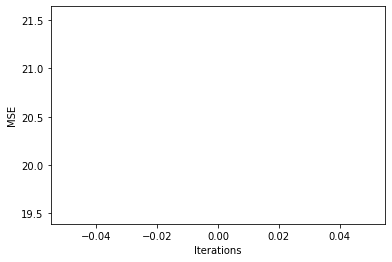

In [55]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 100), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [56]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-0.53231919, -0.45841432, -0.81200058, ..., -0.33229383,
        -0.90208033, -0.39874235],
       [ 2.05597538,  1.92817188,  2.44933399, ...,  1.94253279,
         2.47219153,  2.2545877 ],
       [ 4.93082946,  4.90446831,  4.65357283, ...,  5.83010944,
         4.13071522,  6.67698202],
       ...,
       [ 0.39536597,  0.40883974,  0.30521822, ...,  0.5326462 ,
         0.23115232,  0.60602959],
       [ 0.8019943 ,  0.80072504,  0.74374744, ...,  0.96088149,
         0.65248124,  1.0996854 ],
       [ 3.20991751,  3.18539604,  3.06149771, ...,  3.76456313,
         2.73630088,  4.31328087]])

In [58]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df_1.columns
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -0.5323191908538205)","(8.79, -0.4584143179076048)","(-9.66, -0.8120005788810397)","(-8.16, -1.132084022071018)","(-7.52, -0.4256524755290604)","(-8.5, -0.42091769660801037)","(-9.85, -0.7403376133704302)","(4.17, -0.5289086224303898)","(-8.98, -1.2195992433804437)","(-4.76, -0.38313554027368735)","(-8.5, -0.3762000918531173)","(-6.75, -0.3311478682942834)","(-7.18, -0.6896619925210506)","(8.45, -0.2931299386619902)","(99.0, -0.6290671858781788)","(-7.52, -1.1239206307227805)","(-7.43, -0.47927974722069533)","(-9.81, -0.6988355464069648)","(-9.85, -0.6982936844736491)","(-9.85, -0.9732612365826976)","(-9.37, 0.03376181000171917)","(1.5, -0.5391945870271063)","(-4.37, -0.8957200429430476)","(99.0, -1.3863111542592292)","(-8.5, -0.6557237985864519)","(99.0, -0.2610297695519185)","(99.0, 0.2518799525004879)","(2.86, -0.5021702742871357)","(9.13, 0.3791374818442683)","(-7.43, -1.1669987341356622)","(99.0, 0.04549172504009208)","(-4.08, 0.16929636697459702)","(-9.08, -1.3547249274207258)","(7.82, -0.4878986781186252)","(5.05, 0.2252482965061892)","(4.95, 0.3189152314262327)","(-9.17, -1.2323514307520917)","(-8.4, -0.44268554582736463)","(99.0, -0.45090004645328413)","(99.0, -0.5861956714464388)",...,"(8.59, -0.0765379559767691)","(3.59, 0.009245354695032501)","(-6.84, -0.9959753420338688)","(-9.03, -1.1381305354171567)","(2.82, 0.19320660568016307)","(-1.36, 0.006646617558021122)","(99.0, -1.2755903980325214)","(8.3, -0.029537169686845142)","(5.68, 0.1427821337398717)","(-4.81, -0.7705015536246801)","(nan, -0.8993455023822831)","(nan, -0.16767179233471372)","(99.0, -0.7885679659002927)","(99.0, -1.0780426972252397)","(nan, -0.7791695873232728)","(nan, -0.21773627069752924)","(nan, -0.7616127453160751)","(-9.42, -0.4994460474423223)","(99.0, -0.871731880007596)","(nan, -0.6687281316270188)","(nan, -0.2824537186285603)","(-7.72, -0.693108712351342)","(nan, -0.2742680550492156)","(nan, -0.7130711743429176)","(99.0, -0.6264183348146114)","(nan, -0.6658967717641046)","(99.0, -0.2806092441063185)","(nan, -0.27408144199997886)","(nan, 0.10713697645849411)","(nan, -0.8006238695974534)","(2.82, -0.4111164128451235)","(nan, -0.5703336176371808)","(nan, -0.19550328226482758)","(nan, -0.5114256728165667)","(nan, -0.6268957967170387)","(nan, -0.510291429742353)","(-5.63, -0.34263531121864316)","(nan, -0.3322938345014407)","(nan, -0.9020803254530704)","(nan, -0.3987423456662649)"
1,"(4.08, 2.0559753778126253)","(-0.29, 1.9281718823335035)","(99.0, 2.4493339864579853)","(4.37, 2.4879726269359113)","(-2.38, 1.643038913242972)","(-9.66, 2.462094940443467)","(-0.73, 1.7741899149110512)","(-5.34, 1.0576256477517108)","(8.88, 2.8148095553156907)","(99.0, 1.9167484523374445)","(6.75, 2.3568878662329973)","(8.64, 2.377696508702203)","(4.42, 1.0152911447781376)","(7.43, 2.3097451576645023)","(4.56, 0.7646866181742875)","(-0.97, 1.1253087205393244)","(4.66, 1.012437250091176)","(-0.68, 1.4843024171334263)","(3.3, 2.0363002920398885)","(-1.21, 2.165969297995629)","(0.87, 1.922398020600193)","(99.0, 2.3680371409398906)","(8.35, 2.6082003054310694)","(9.17, 2.6510102466904835)","(0.05, 2.4407818972106767)","(7.57, 2.2048072693532252)","(4.71, 1.70522434774041)","(0.87, 2.5327325384204253)","(-0.39, 1.3948483789583388)","(6.99, 2.9877426945417187)","(6.5, 1.8680723883085295)","(-0.92, 1.8247907694022834)","(7.14, 2.8516143058025265)","(9.03, 2.3693216608976315)","(-1.8, 1.7454740905574773)","(0.73, 1.5305290322678635)","(7.09, 2.4297633995772245)","(3.4, 2.206121403558542)","(-0.87, 2.419009700796491)","(7.91, 2.4945664235283362)",...,"(-6.7, 2.186230984183089)","(-3.35, 2.097024371281056)","(-9.03, 2.8720588609654585)","(4.47, 2.5791223727812724)","(99.0, 1.6567640121569496)","(-3.83, 1.9788943324521864)","(99.0, 2

In [60]:
user_df = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Users')
movies_df = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Items')

In [73]:
movies_df.loc[movies_df['Movie ID'] == 1637]['Factor11']

76    0.583795
Name: Factor11, dtype: float64

In [79]:
head= movies_df.sort_values(by='Factor5',axis=0, ascending=False)
head.head() 

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
15,121,The Lord of the Rings: The Two Towers (2002),-2.016728,-2.512933,2.296764,0.352801,2.750878,-0.374777,1.084939,-0.709093,1.183528,1.348406,-0.324642,-0.623675,-0.595091,-0.330821,-0.292928
16,122,The Lord of the Rings: The Return of the King ...,-2.271110,-2.526300,2.142566,0.341954,2.688624,-0.360610,1.140343,-0.932931,1.356982,1.331742,-0.454221,-0.620533,-0.638745,-0.172093,-0.314937
14,120,The Lord of the Rings: The Fellowship of the R...,-2.247395,-2.510061,2.310822,0.376040,2.677432,-0.354463,1.133873,-0.751725,1.444931,1.348524,-0.223710,-0.495453,-0.859071,-0.167967,-0.276280
47,597,Titanic (1997),1.567865,-1.516952,-2.523378,1.204485,1.729541,-0.088941,0.102822,1.747792,1.816958,-2.986807,-0.589441,-2.568582,0.370387,2.215933,0.456127
79,1894,Star Wars: Episode II - Attack of the Clones (...,1.480274,-1.711204,1.128254,-1.031576,1.544977,1.662894,-2.001102,0.691944,-3.324583,-0.760322,-0.611091,0.329280,0.627406,0.226807,0.564640


In [80]:

user= user_df.loc[user_df['User'] == 3806].values[0][1:]

movie = movies_df.loc[movies_df['Movie ID'] == 1900].values[0][2:]


user.dot(movie)

-0.10894853752980418

In [81]:

user= user_df.loc[user_df['User'] == 768].values[0][1:]

movie = movies_df.loc[movies_df['Movie ID'] == 585].values[0][2:]


user.dot(movie)

-0.04560598226676078

In [89]:
# In the movies dataset, if you had to recommend 2 movies to the user with ID=4997, which ones would you choose?


preference = user_df[user_df['User'] == 4997].iloc[:, -15:].values
feature = movies_df.iloc[:, -15:].values.T
movies_df['ans'] = preference.dot(feature).T

print(movies_df.sort_values(by='ans', axis=0, ascending=False)['Title'].values)

['The Matrix Reloaded (2003)' 'Spider-Man 2 (2004)' 'Spider-Man (2002)'
 'Star Wars: Episode II - Attack of the Clones (2002)'
 'Batman Begins (2005)' 'Independence Day (a.k.a. ID4) (1996)'
 'The Dark Knight (2008)' 'Mission: Impossible II (2000)' 'X-Men (2000)'
 'Gladiator (2000)' 'Mission: Impossible (1996)'
 'The Bourne Supremacy (2004)' 'X2: X-Men United (2003)'
 'The Bourne Identity (2002)' 'The Matrix (1999)' 'Braveheart (1995)'
 'Minority Report (2002)' 'Batman Forever (1995)'
 'A Beautiful Mind (2001)' 'The Sixth Sense (1999)'
 'Terminator 2: Judgment Day (1991)' 'Die Hard: With a Vengeance (1995)'
 'The Shawshank Redemption (1994)' 'Cast Away (2000)' 'Batman (1989)'
 'The Departed (2006)' 'The Rock (1996)' "Ocean's Eleven (2001)"
 'Speed (1994)' 'Catch Me If You Can (2002)' 'Saving Private Ryan (1998)'
 'The Patriot (2000)' 'Star Wars: Episode VI - Return of the Jedi (1983)'
 'Star Wars: Episode IV - A New Hope (1977)' 'Titanic (1997)'
 'Star Wars: Episode V - The Empire Strik

In [91]:
# In the movies dataset, if you had to recommend 3 movies to the user with ID=4997, which ones would you choose?


preference = user_df[user_df['User'] == 4997].iloc[:, -15:].values
feature = movies_df.iloc[:, -15:].values.T
movies_df['ans'] = preference.dot(feature).T

print(movies_df.sort_values(by='ans', axis=0, ascending=False)['Movie ID'].values)

[  558   557   155   272   954 36657   955  2501  9806  2502   603 36658
   161   280    77  1572   602   268   180   629  1422   550   607    98
   604   862    12   640  4327   238   745  1637   278   752   585   329
   146   105   414   275    63    38    14   807    22   274  9802  5503
   812   680    85  1900  1891   809   153 36955  8587   107   568  9741
  8358   857   808  7443   134   141   453  9331   786  2164   597   641
  1892    11   197   243   854  2024 10020   194   187   601  1597   664
  3049   393    24   424   462   114   581  8467    13  1894   788   672
   122   671   120   121]
